In [1]:
from create_data_single import Circ as cc
from dgcnsuq import DGCN as cn
import matplotlib
import matplotlib.pyplot as plt

In [2]:
data_instance = cc(0.4, 0.4, 0.2, 26)
fpc, fnc, pc, lp, tc, lt = data_instance.create_dataset(5, 1, [100], [0.2], True, 10)

In [3]:
import torch
torch.manual_seed(26)
fpc, fnc, pc, lp, tc, lt = torch.tensor(fpc), torch.tensor(fnc), torch.tensor(pc), torch.tensor(lp), torch.tensor(tc), torch.tensor(lt)

In [4]:
pc.view(-1, pc.size(-1)).shape

torch.Size([280, 2])

In [5]:
training_data = pc.reshape(-1, pc.size(-1))
test_data = tc[0]
noise_var = 0.01
training_label = noise_var * torch.randn(training_data.size(0))
test_label = torch.Tensor(test_data.size(0))

In [6]:
training_data.shape

torch.Size([280, 2])

In [7]:
model = cn(training_data, test_data, training_label, test_label, False, 2, noise_var)

In [8]:
model.train_kernel(num_epochs=200, batch_size=20, learning_rate=0.00005, print_every=3)

/servers/ash/hdd-home3/dghosh/Documents/Thesis/1notebooks/dgcnsuq.py:9: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1724788960438/work/aten/src/ATen/native/TensorShape.cpp:3697.)
  dist_term = -0.5 * (label - mean).T @ torch.linalg.inv(variance) @ (label - mean)


Epoch:0, Loss: -12.023667335510254
Epoch:3, Loss: -13.795542311390358
Epoch:6, Loss: -14.589217846516863
Epoch:9, Loss: -15.423060935611499
Epoch:12, Loss: -16.283614136228625
Epoch:15, Loss: -17.10633177624378
Epoch:18, Loss: -17.835579936410042
Epoch:21, Loss: -18.588874875653726
Epoch:24, Loss: -19.46899972784332
Epoch:27, Loss: -20.5095234577088
Epoch:30, Loss: -21.778122891514084
Epoch:33, Loss: -23.07208860476201
Epoch:36, Loss: -23.65158711452207
Epoch:39, Loss: -23.9351451357357
Epoch:42, Loss: -24.1484823848158
Epoch:45, Loss: -24.28177375177084
Epoch:48, Loss: -24.390584865462166
Epoch:51, Loss: -24.48281757821699
Epoch:54, Loss: -24.561489100680372
Epoch:57, Loss: -24.621982385394606
Epoch:60, Loss: -24.671620343865094
Epoch:63, Loss: -24.715031753466945
Epoch:66, Loss: -24.7515843648382
Epoch:69, Loss: -24.785422891405144
Epoch:72, Loss: -24.816621263101492
Epoch:75, Loss: -24.84600842084467
Epoch:78, Loss: -24.87269045525525
Epoch:81, Loss: -24.895850242145837
Epoch:84, Lo

In [9]:
model.compute_posterior_batch(training_data, training_label, test_data, test_label, True)

(tensor([ 7.0744e-04,  1.2293e-03,  1.1769e-03,  1.1997e-03,  1.7609e-03,
          1.2601e-03,  1.5378e-03,  5.5277e-04,  3.1775e-05, -1.2951e-04,
          1.3320e-03,  1.6052e-03,  1.3139e-03,  3.2886e-05, -2.6806e-04,
          5.4032e-04,  7.1896e-04,  1.3988e-03,  8.0494e-04,  1.2232e-03,
          2.0857e-03,  2.1024e-04,  8.9532e-04,  1.3084e-03,  1.0490e-03,
          6.7365e-05,  9.2604e-04,  7.0736e-04, -5.4201e-04,  1.2975e-03,
          1.8629e-03,  3.5069e-04,  7.4840e-04,  1.4134e-03,  8.5987e-04,
          1.1583e-03,  1.0452e-03,  1.5890e-03,  1.6853e-03,  6.1409e-04,
          8.1281e-04,  1.0009e-03,  1.2039e-03,  2.2097e-03,  1.2999e-03,
          1.5216e-03,  1.5647e-03,  5.4175e-04,  3.9874e-04,  1.3376e-03,
          8.5427e-04,  1.3166e-03,  1.8864e-03,  1.5723e-03,  1.2900e-03,
          1.8394e-03], grad_fn=<MvBackward0>),
 tensor([[-3.1841e-04, -3.7247e-04, -4.2450e-04,  ..., -4.1932e-04,
          -4.3470e-04, -4.1634e-04],
         [-5.3167e-05,  1.5497e-06

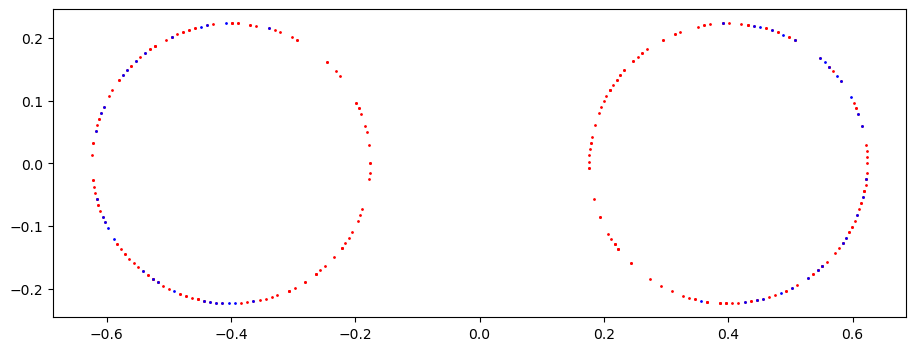

In [10]:
fig = plt.figure(figsize=(11, 4))
ax = fig.add_subplot(111)
ax.scatter(training_data.cpu().numpy()[:, 0], training_data.cpu().numpy()[:, 1], c='r', s=1)
ax.scatter(test_data.cpu().numpy()[:, 0], test_data.cpu().numpy()[:, 1], c='b', s=1)

Text(0.5, 1.0, 'Probability of being on the surface')

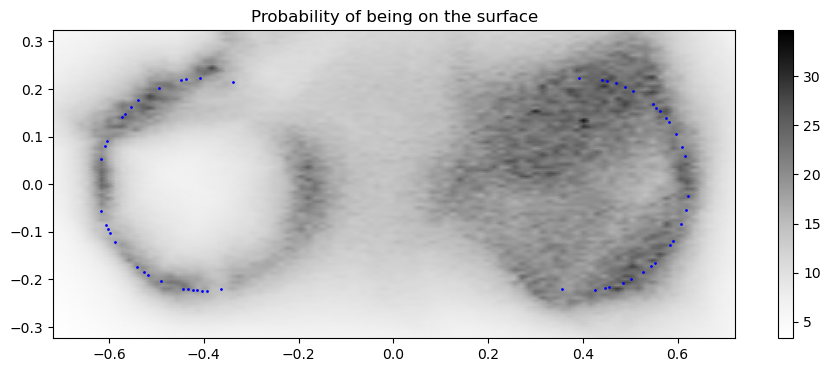

In [11]:
import numpy as np
from scipy.stats import norm
grid_sizes = np.ones(2, dtype=np.int32) * 100
def create_grid(box_min=None, box_max=None, eps=0.1):
    # find the bounding box for all dataset
    if box_min is None:
        box_min = torch.amin(test_data, 0) - eps
    if box_max is None:
        box_max = torch.amax(test_data, 0) + eps

    # Build a grid (dimension-agnostic)
    grid_vertices = np.meshgrid(
        *[np.linspace(box_min[d], box_max[d], grid_sizes[d]) for d in range(2)])
    grid_vertices = np.stack(grid_vertices, axis=-1).reshape(-1, 2)
    grid_vertices = torch.tensor(grid_vertices, dtype=torch.float32)
    return grid_vertices
grid_data = create_grid()
grid_label = torch.Tensor(grid_data.size(0))
training_label = noise_var * torch.randn(test_data.size(0))
pm, pv = model.compute_posterior_batch(test_data, training_label, grid_data, grid_label, True)
pd = torch.diagonal(pv, 0)
with torch.no_grad():
    prob_on_surface = norm.pdf(np.zeros(pm.shape), loc=pm.cpu().detach().numpy(),
                               scale=np.sqrt(pd.cpu().detach().numpy()))
gp = grid_data.cpu().numpy()
gp_x = gp[:, 0].reshape(grid_sizes)
gp_y = gp[:, 1].reshape(grid_sizes)
gp_prob = prob_on_surface.reshape(grid_sizes)

fig = plt.figure(figsize=(11, 4))
ax = fig.add_subplot(111)
plot = ax.pcolormesh(gp_x, gp_y, gp_prob, shading='gouraud', cmap='Greys')
ax.scatter(test_data.cpu().numpy()[:, 0], test_data.cpu().numpy()[:, 1], c='b', s=1)
fig.colorbar(plot)
ax.axis('equal')
ax.set_title(f'Probability of being on the surface')